# Pruning deep neural networks to make them fast and small
## Train a VGG16 model for COVID19 detection, compress the model with pruning the model using Optimal Brain Damage (OBD) method

M. Amintoosi, m.amintoosi at gmail.com

This repository is based on the following 

https://jacobgil.github.io/deeplearning/pruning-deep-learning

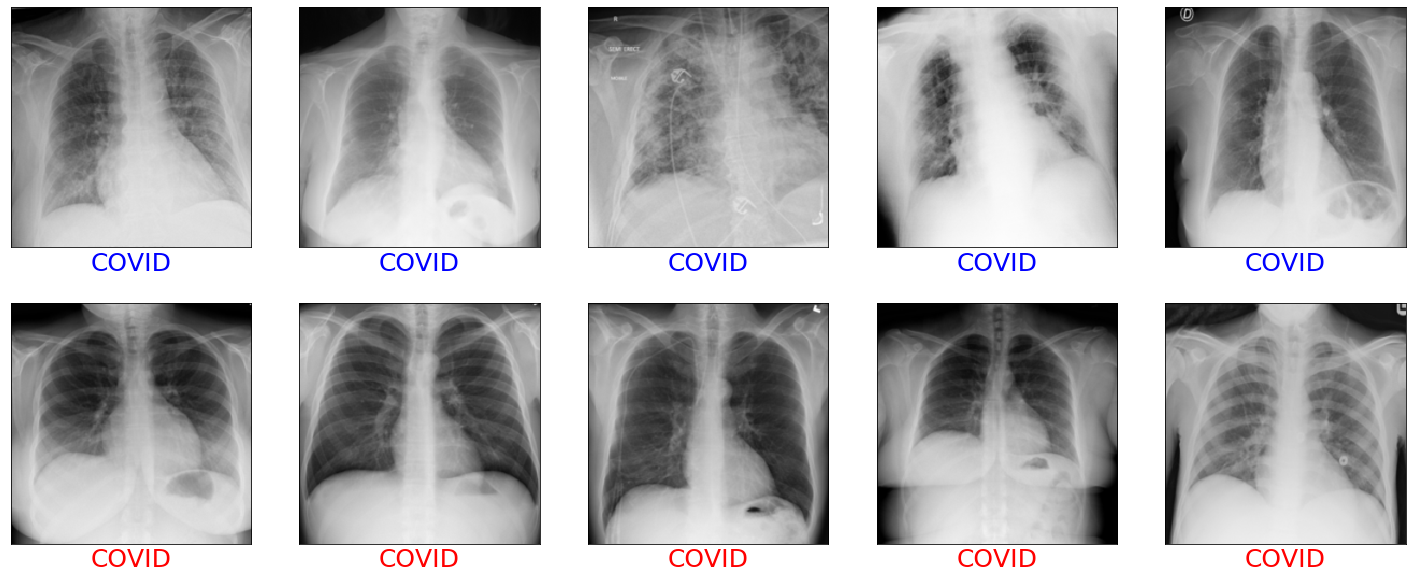

Accuracy : 0.595


In [74]:
%run finetune_SpReg.py --test --ds_name COVID-Radiography \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test

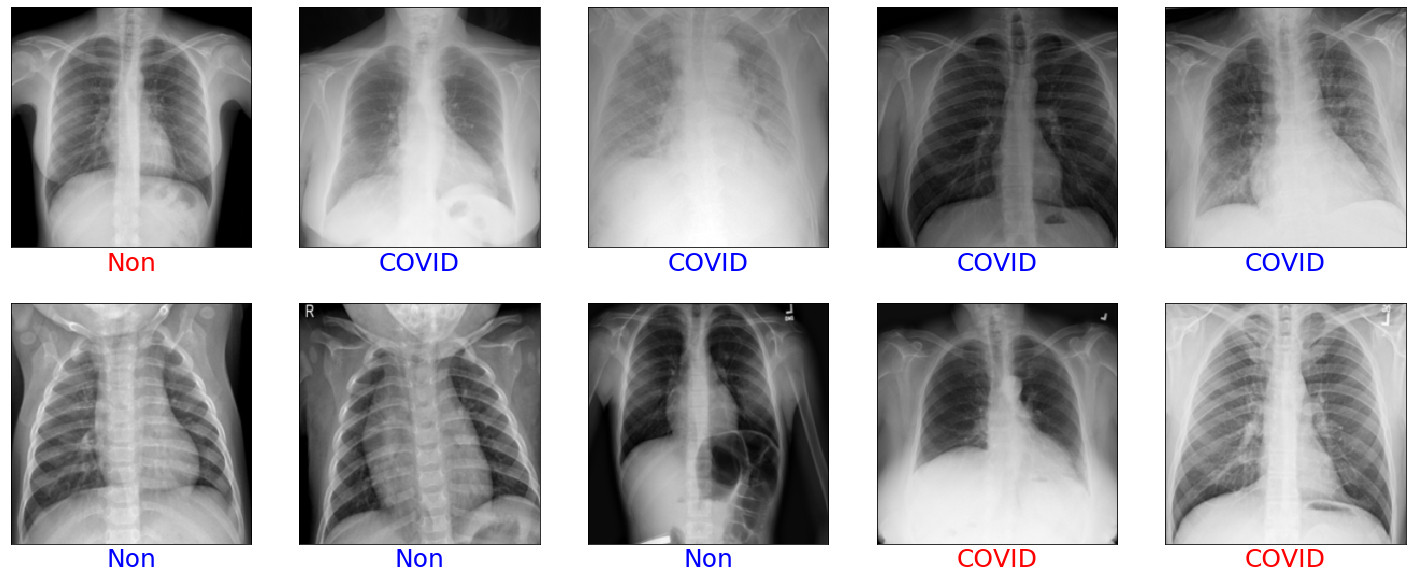

Accuracy : 0.7


In [16]:
%run finetune_SpReg.py --test --ds_name COVID-Radiography --reg_name HSQGL12 \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test

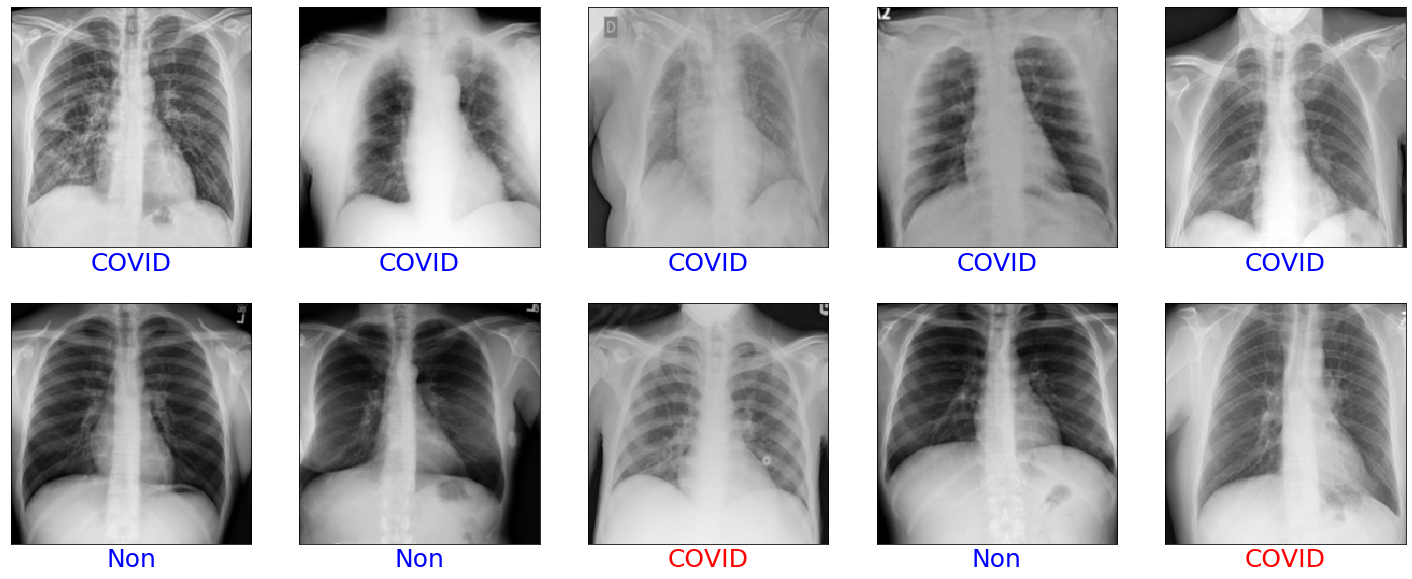

Accuracy : 0.695


In [75]:
%run finetune_SpReg.py --test --ds_name COVID-Radiography --reg_name HSQGL12 \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/test

In [71]:
models_dir = 'C:/Archive/data/models/covid/'

ds_name = 'COVID-Radiography'
eps = 1e-3
for prn in ['','_pruned']:
    for reg_name in ['None','HSQGL12']:
        model_file_name = '{}VGG_model_{}_reg-{}{}.pt'.format(models_dir, ds_name, reg_name,prn)
        model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
        num_el = 0
        num_zeros = 0
        for n, _module in model.named_modules():
            if isinstance(_module, nn.Conv2d) and (not 'downsample' in n):
                w = torch.flatten(_module.weight)
                num_el += w.shape[0]
                num_zeros += torch.sum(torch.abs(w)<eps)
        nz = num_zeros.cpu().detach().numpy()
        print(model_file_name, num_zeros, num_el, nz/num_el)        


C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-None.pt tensor(702298) 14710464 0.047741390074439526
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-HSQGL12.pt tensor(702298) 14710464 0.047741390074439526
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-None_pruned.pt tensor(41148) 998775 0.04119846812345123
C:/Archive/data/models/covid/VGG_model_COVID-Radiography_reg-HSQGL12_pruned.pt tensor(41426) 987318 0.041958112786356576


In [67]:
nz = num_zeros.cpu().detach().numpy()#, num_el
nz/num_el

0.4475241569538527

In [45]:
# print(model)
x = 0
eps = 1e-3
for n, _module in model.named_modules():
    if isinstance(_module, nn.Conv2d) and (not 'downsample' in n):
        # print(torch.flatten(_module.weight).shape)
        w = torch.flatten(_module.weight)
        x += torch.sum(torch.abs(w)<eps)
        # print(x)
        # x += torch.norm(, 2)
        # break
print(x)        

tensor(41148)


In [ ]:
# !git clone https://github.com/mamintoosi/OBD-for-VGG-Pruning-COVID19

In [ ]:
# %cd OBD-for-VGG-Pruning-COVID19

In [22]:
# Download a pre-trained VGG16 model and train it
# %%time
# %run finetune_SpReg.py --train --use-cuda --train_path 'data/train' --test_path 'data/val'
# %run finetune.py --train --train_path 'C:/temp/git/OBD-for-VGG-Pruning-COVID19/data/train' --test_path 'C:/temp/git/OBD-for-VGG-Pruning-COVID19/data/val'

In [ ]:
# Print the trained model
print(model)

In [ ]:
# Pruning the trained model
# %%time
# %run finetune.py --prune --use-cuda --train_path 'data/train' --test_path 'data/val'

In [ ]:
# Print the pruned model
print(model)

In [ ]:
# Test the pruned model
# %run finetune.py --test --train_path 'data/train' --test_path 'data/test'

In [73]:
%%time
# For reproducible results 
# torch.manual_seed(1)
# random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg.py --train --train_epoch 4 --reg_name L1 --ds_name COVID-Radiography \
  --train_path data/COVID-Radiography/train --test_path data/COVID-Radiography/val

Epoch:  0 / 4


AttributeError: module '__main__' has no attribute '__spec__'